In this tutorial, we will implement an autoencoder for MNIST dataset <br />
Note that for MNIST dataset, the value of each pixel is binary(either 0 or 1)


In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
#Build a autoencoder with deep neural network

def build_mlp(input_placeholder,scope):
    with tf.variable_scope(scope):
        enc = tf.layers.dense(inputs = input_placeholder, units=128, activation= tf.nn.relu)
        enc = tf.layers.dense(inputs = enc, units=128, activation= tf.nn.relu)
        enc = tf.layers.dense(inputs = enc, units=64, activation= tf.nn.relu)
        
        dec = tf.layers.dense(inputs = enc, units=64, activation= tf.nn.tanh)
        dec = tf.layers.dense(inputs = dec, units=128, activation= tf.nn.tanh)
        dec = tf.layers.dense(inputs = dec, units=784, activation= tf.nn.tanh)
    return dec

In [3]:
#input tensor

with tf.name_scope('input_data'):
    x = tf.placeholder(tf.float32, shape = [None , 784]) #None means that it can be any arbitary
with tf.name_scope('output_image'):
    y = build_mlp(x,'aue')

In [4]:
#loss function:
loss = tf.losses.mean_squared_error(x, y)
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [5]:
BATCH_SIZE = 128 #Define a batch size, it should be at the head of the program, not this cell,anyway
NUM_EPO = 10
SKIP_STEP = 10
init = tf.global_variables_initializer() 
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    total_cost = 0
    for i in range(BATCH_SIZE*NUM_EPO):
        train_x, train_y = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch = sess.run([optimizer, loss], feed_dict={x: train_x})
        total_cost += loss_batch
        if (i + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(i + 1, total_cost / SKIP_STEP))
            total_cost = 0.0       # Reset for next average
    save_path = saver.save(sess, "saver/model.ckpt")
    print("Model saved in file: %s" % save_path)

Average loss at step 10:   0.1
Average loss at step 20:   0.1
Average loss at step 30:   0.1
Average loss at step 40:   0.1
Average loss at step 50:   0.1
Average loss at step 60:   0.1
Average loss at step 70:   0.0
Average loss at step 80:   0.0
Average loss at step 90:   0.0
Average loss at step 100:   0.0
Average loss at step 110:   0.0
Average loss at step 120:   0.0
Average loss at step 130:   0.0
Average loss at step 140:   0.0
Average loss at step 150:   0.0
Average loss at step 160:   0.0
Average loss at step 170:   0.0
Average loss at step 180:   0.0
Average loss at step 190:   0.0
Average loss at step 200:   0.0
Average loss at step 210:   0.0
Average loss at step 220:   0.0
Average loss at step 230:   0.0
Average loss at step 240:   0.0
Average loss at step 250:   0.0
Average loss at step 260:   0.0
Average loss at step 270:   0.0
Average loss at step 280:   0.0
Average loss at step 290:   0.0
Average loss at step 300:   0.0
Average loss at step 310:   0.0
Average loss at s

In [6]:

with tf.Session() as sess:
    saver.restore(sess, "saver/model.ckpt")
    print("Model restored.")
    
    print (sess.run(loss, feed_dict={x: mnist.test.images}))

INFO:tensorflow:Restoring parameters from saver/model.ckpt
Model restored.
0.0355894


INFO:tensorflow:Restoring parameters from saver/model.ckpt
Model restored.


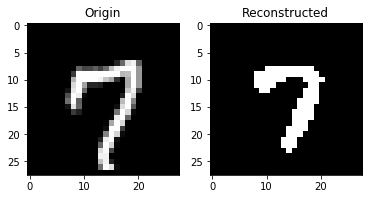

In [7]:
from matplotlib import pyplot
%matplotlib inline
#Print several images and its reconstruction in the testset
with tf.Session() as sess:
    saver.restore(sess, "saver/model.ckpt")
    print("Model restored.")
    
    X,label = mnist.test.next_batch(1)
    out_image = (sess.run(y, feed_dict={x: X}))
    img = out_image>0.5
    img = img.reshape(28,28)
    X = X[0].reshape(28,28)
    plt.subplot(1,2,1)
    plt.imshow(X, cmap='gray')
    plt.title('Origin')
    plt.subplot(1,2,2)
    plt.imshow(img, cmap='gray')
    plt.title('Reconstructed')
    plt.show()
    
    
    